# Using Maths to Rig Elections

In this notebook, we'll see a demonstration and explanation of Benford's Law—a crime-fighting mathematical tool that can flag up when a set of figures have been doctored.  This rule has notably been used to catch out crooks faking their financial statements and has even been used as evidence to suggest that election results have been fabricated.

In [1]:
# Import modules for maths, data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn')

# Read in data
countries = pd.read_csv("Data/countries.csv", encoding="ISO-8859-1")

# Inspect first few rows of data
countries.head()

,Name,Population
0,China,"1,439,323,776"
1,India,"1,380,004,385"
2,United States,"331,002,651"
3,Indonesia,"273,523,615"
4,Pakistan,"220,892,340"


In [2]:
# Slice off leading digit from population figures
countries["Leading digit"] = countries["Population"].astype("str").str[0].astype("int")
countries.head()

,Name,Population,Leading digit
0,China,"1,439,323,776",1
1,India,"1,380,004,385",1
2,United States,"331,002,651",3
3,Indonesia,"273,523,615",2
4,Pakistan,"220,892,340",2


In [3]:
# Frequency table of leading digits
digit_frequencies = countries["Leading digit"].value_counts().sort_index()
digit_frequencies

1    70
2    37
3    30
4    21
5    26
6    18
7     8
8    14
9    11
Name: Leading digit, dtype: int64

Let's plot the relative frequencies of the different possible leading digits:

Text(6, 45, 'For example:\n1,439,323,776 --> 1,\n273,523,615 --> 2,\nand so on')

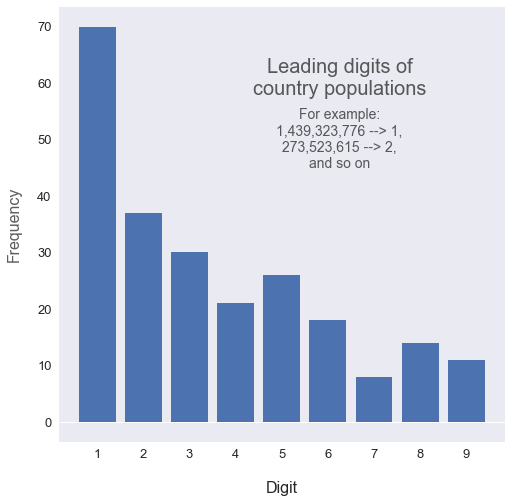

In [4]:
# Set up plotting area
fig, ax = plt.subplots(figsize=(8,8))

# Plot data as a bar graph
p1 = ax.bar(np.arange(9) + 0.75, digit_frequencies.values)

# Add x ticks
plt.xticks(np.arange(0,9) + 0.75, fontsize=10)
ax.set_xticklabels(digit_frequencies.index)

# Set font sizes for tick labels
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)

# Make the zero line more visible
plt.axhline(y=-0.05, xmin=0, xmax=1, color="white", linewidth=1)

# Add x label
ax.set_xlabel("Digit", labelpad=20, fontsize=16)

# Add y label
ax.set_ylabel("Frequency", alpha = .75, labelpad=15, fontsize=16)

# Remove gridlines
ax.grid(False)

# Add title
ax.text(x = 6, y = 58, s = "Leading digits of\ncountry populations", fontsize = 20, alpha = .75, ha="center")

# Add explanatory text
ax.text(x = 6, y = 45, s = "For example:\n1,439,323,776 --> 1,\n273,523,615 --> 2,\nand so on",
            fontsize = 14, alpha = .75, ha="center")

Consider the population {1, 2, 3, 4, ...} up to some upper limit.  Let's see how the probability of obtaining a given leading digit varies as the population size increases.

In [5]:
# Do the maths
digits_so_far = {key:0 for key in range(1,10)}
probabilities = {key:[] for key in range(1,10)}
probabilities 

for i in range(1,1000000):
    digit = int(str(i)[0])
    digits_so_far[digit] += 1
    for j in range(1,10):
        probabilities[j].append(digits_so_far[j]/i)

Plot how the probability of obtaining a leading 1 varies with population size:

Text(20, 0.8, 'Probability of\nleading digit being a 1')

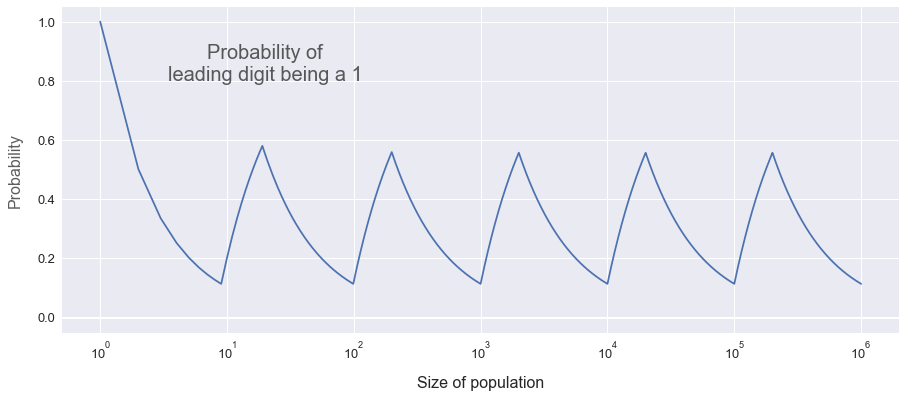

In [6]:
# Set up plotting area
fig, ax = plt.subplots(figsize=(15,6))

# Set up log scale x-axis
plt.xscale("log")

# Set font sizes for tick labels
plt.setp(ax.get_xticklabels(), fontsize=13)
plt.setp(ax.get_yticklabels(), fontsize=13)

# Plot probabilities as a line graph
ax.plot(np.arange(1,1000000), probabilities[1])

# Make the zero line more visible
plt.axhline(y=-0.005, xmin=0, xmax=1, color="white", linewidth=1)

# Add x label
ax.set_xlabel("Size of population", labelpad=15, fontsize=16)

# Add y label
ax.set_ylabel("Probability", alpha = .75, labelpad=15, fontsize=16)

# Add title
ax.text(x = 20, y = 0.8, s = "Probability of\nleading digit being a 1", fontsize = 20, alpha = .75, ha="center")

Now let's extend the plot to include the probability of obtaining the other leading digits:

1
2
3
4
5
6
7
8
9


Text(20, 0.8, 'Probability of\nleading digit being a...')

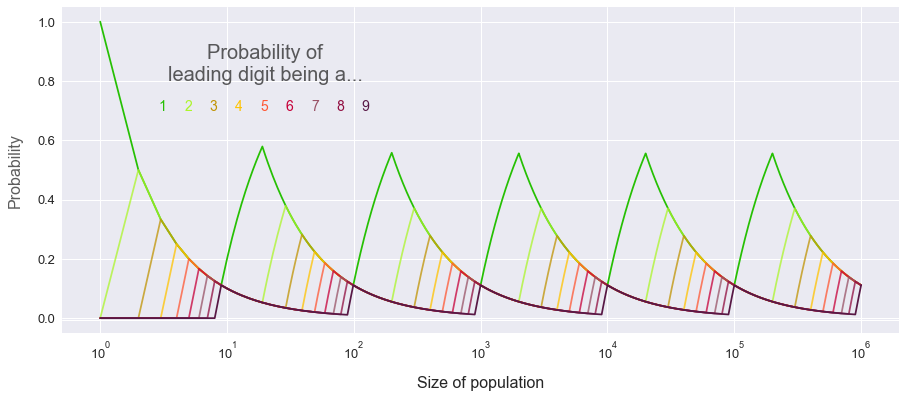

In [7]:
# Set up plotting area
fig, ax = plt.subplots(figsize=(15,6))

# Set up log scale x-axis
plt.xscale("log")

# Set font sizes for tick labels
plt.setp(ax.get_xticklabels(), fontsize=13)
plt.setp(ax.get_yticklabels(), fontsize=13)

# Plot probabilities as a line graph
cols = ["#26c003", "#acf52b", "#c09303", "#ffc300", "#ff5733", "#c70039", "#995266", "#900C3F", "#581845"]
alphas = [1] + [0.75]*7 + [1]

for i in range(1,10):
    print(i)
    ax.plot(np.arange(1,1000000), probabilities[i], alpha=alphas[i-1], color=cols[i-1])
    ax.text(x = 10**(0.325+0.2*i), y = 0.7, s = str(i),
            fontsize = 14, ha="right", color=cols[i-1])

# Make the zero line more visible
plt.axhline(y=-0.005, xmin=0, xmax=1, color="white", linewidth=1)

# Add x label
ax.set_xlabel("Size of population", labelpad=15, fontsize=16)

# Add y label
ax.set_ylabel("Probability", alpha = .75, labelpad=15, fontsize=16)

# Add title
ax.text(x = 20, y = 0.8, s = "Probability of\nleading digit being a...", fontsize = 20, alpha = .75, ha="center")